In [ ]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Drop irrelevant columns
data = data.drop(columns=['SR', 'id'])

# Encode categorical columns using LabelEncoder
categorical_columns = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Fill missing values in 'Arrival_Delay_in_Minutes' with column mean
data['Arrival_Delay_in_Minutes'] = data['Arrival_Delay_in_Minutes'].fillna(data['Arrival_Delay_in_Minutes'].mean())

# Separate features and target variable
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']


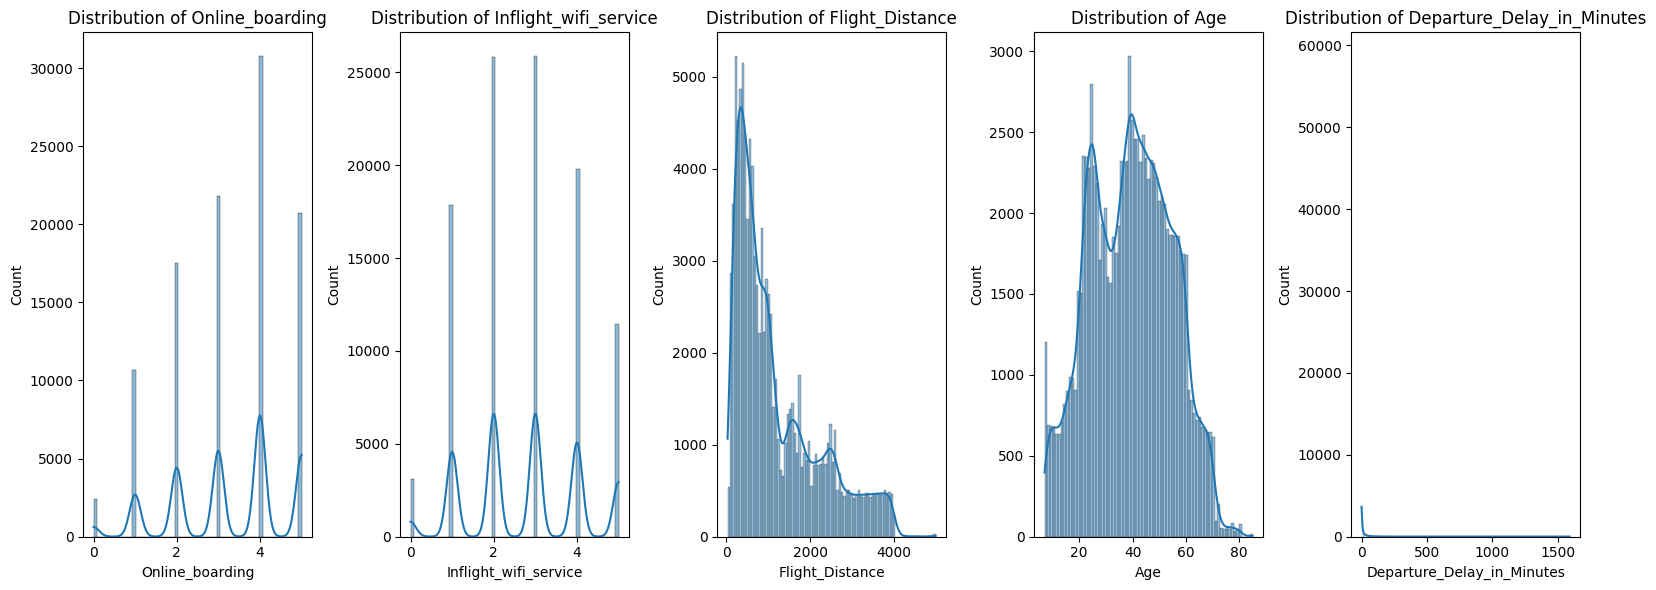

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of important numerical features
plt.figure(figsize=(16, 6))
important_features = ['Online_boarding', 'Inflight_wifi_service', 'Flight_Distance', 'Age', 'Departure_Delay_in_Minutes']
for i, feature in enumerate(important_features, 1):
    plt.subplot(1, len(important_features), i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


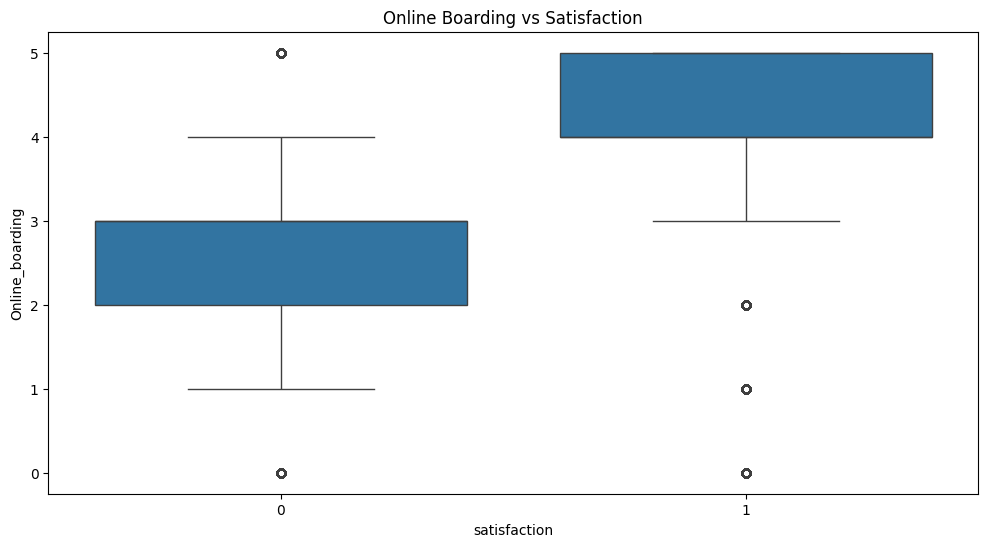

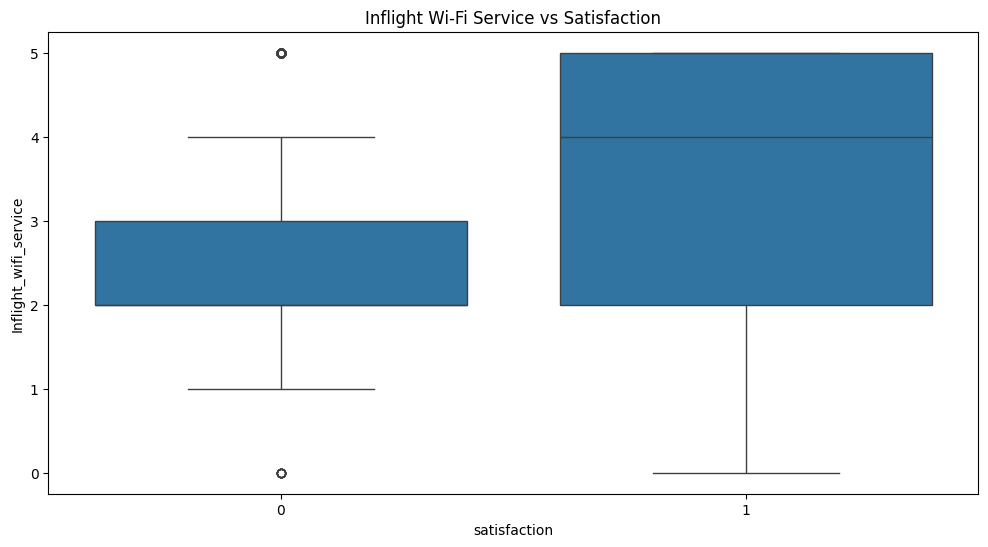

In [3]:
# Box plot for Online_boarding and Inflight_wifi_service against Satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(x='satisfaction', y='Online_boarding', data=data)
plt.title('Online Boarding vs Satisfaction')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='satisfaction', y='Inflight_wifi_service', data=data)
plt.title('Inflight Wi-Fi Service vs Satisfaction')
plt.show()


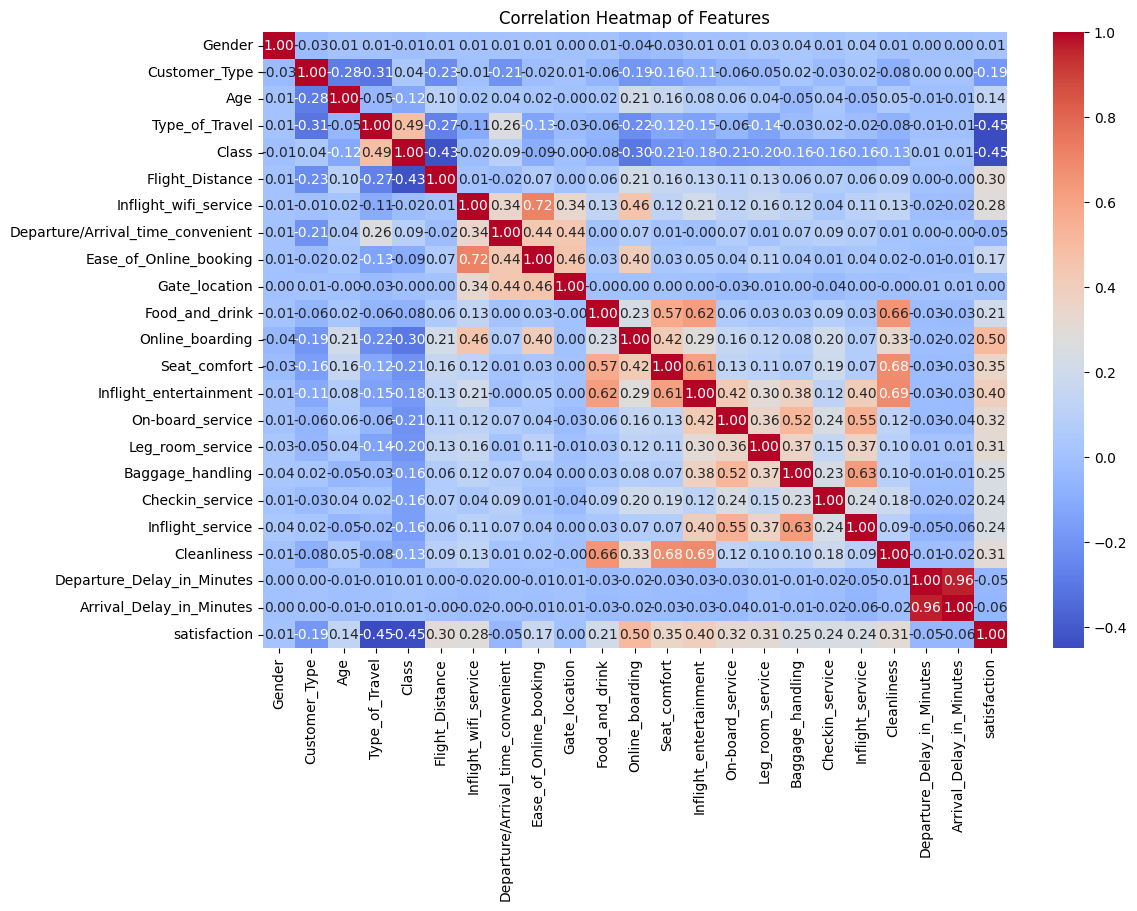

In [4]:
# Compute the correlation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


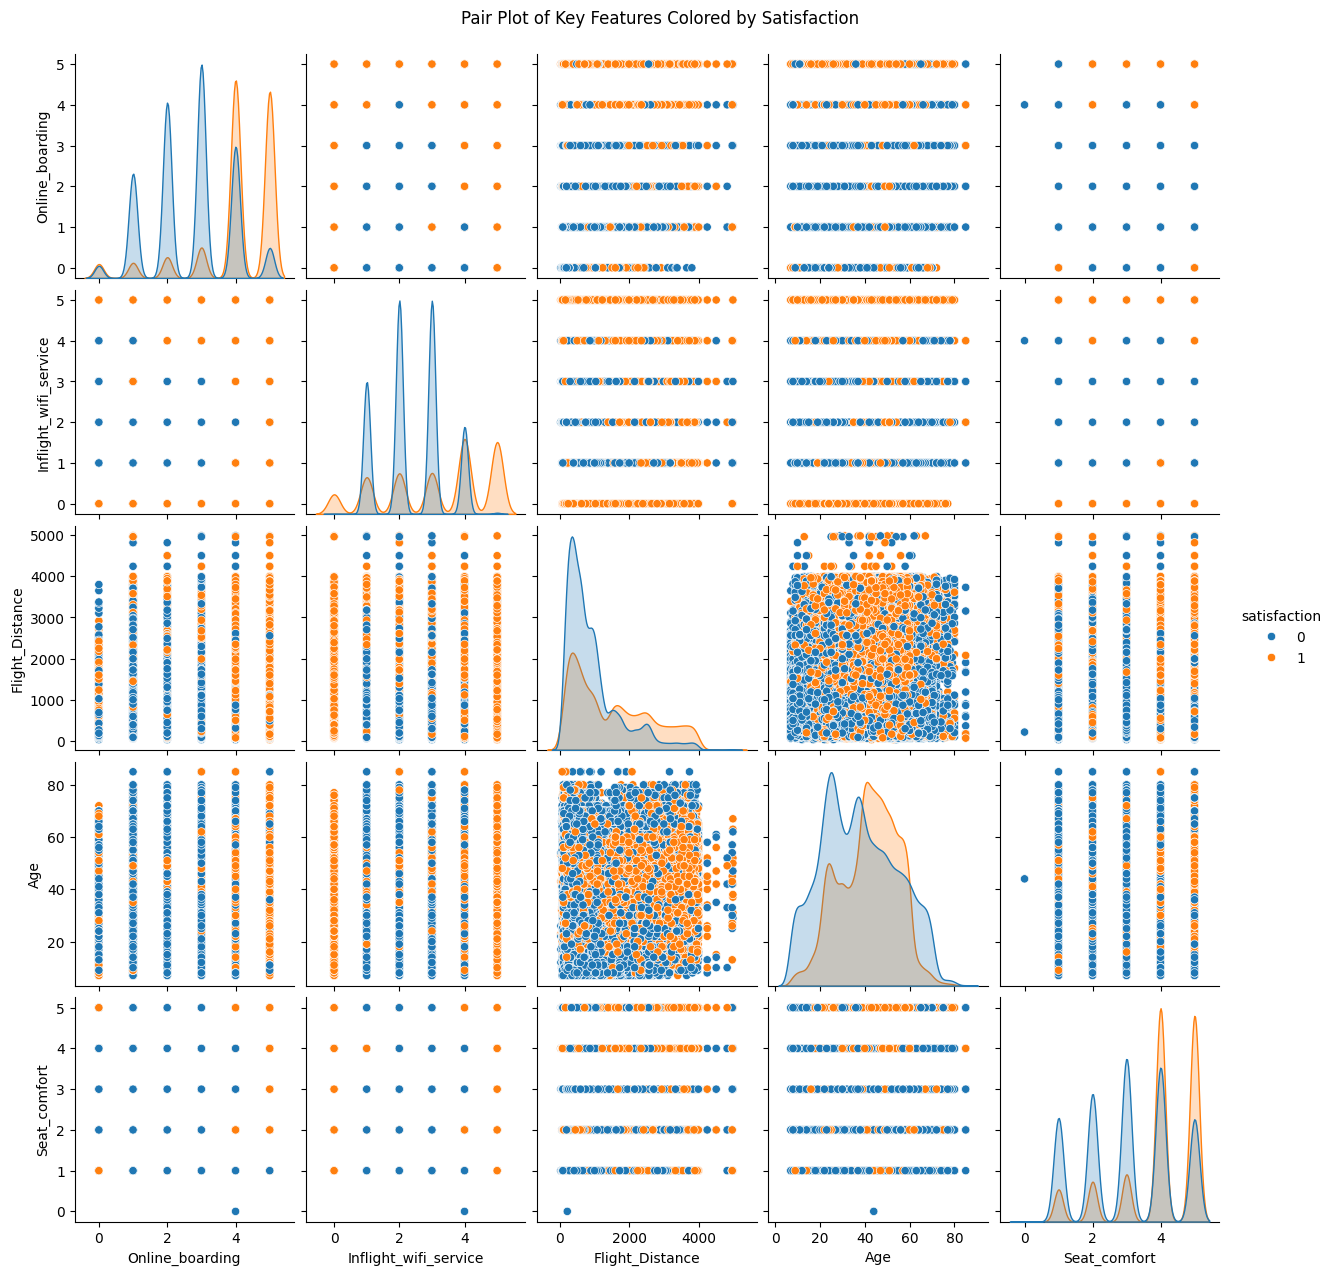

In [5]:
# Pair plot for top features with satisfaction as hue
sns.pairplot(data, vars=['Online_boarding', 'Inflight_wifi_service', 'Flight_Distance', 'Age', 'Seat_comfort'], hue='satisfaction')
plt.suptitle('Pair Plot of Key Features Colored by Satisfaction', y=1.02)
plt.show()


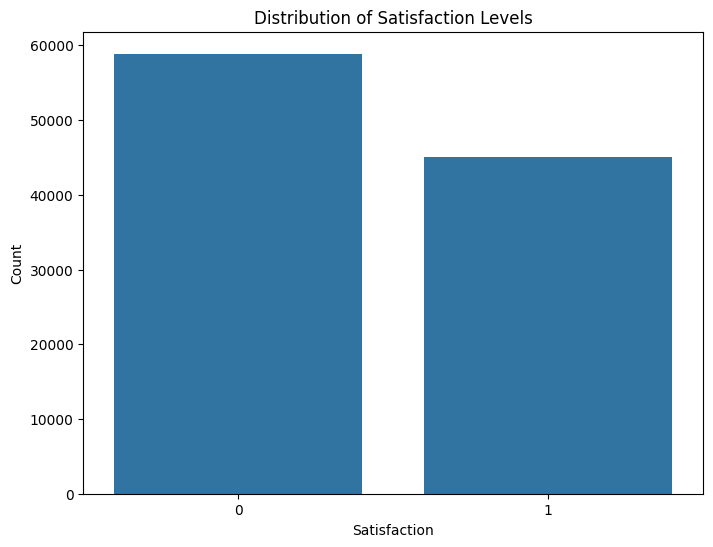

In [6]:
# Bar plot to show satisfaction levels
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', data=data)
plt.title('Distribution of Satisfaction Levels')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming the target column is 'satisfaction'
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")


Accuracy of the Random Forest model: 96.21%


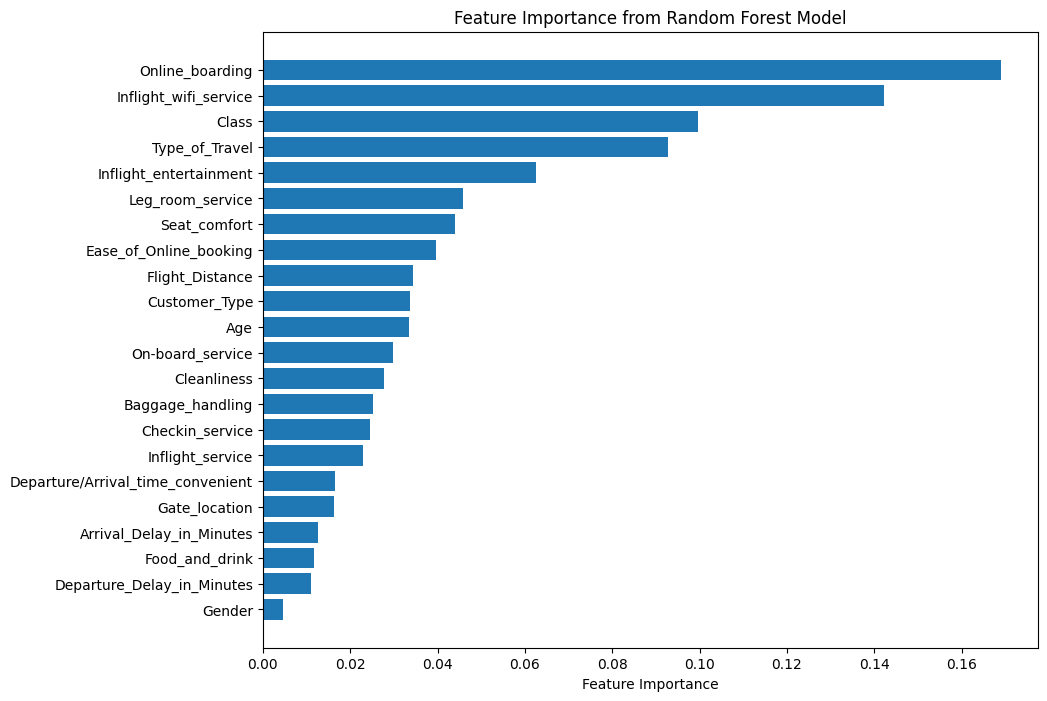

In [8]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importances and sort them
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]  # Descending order

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


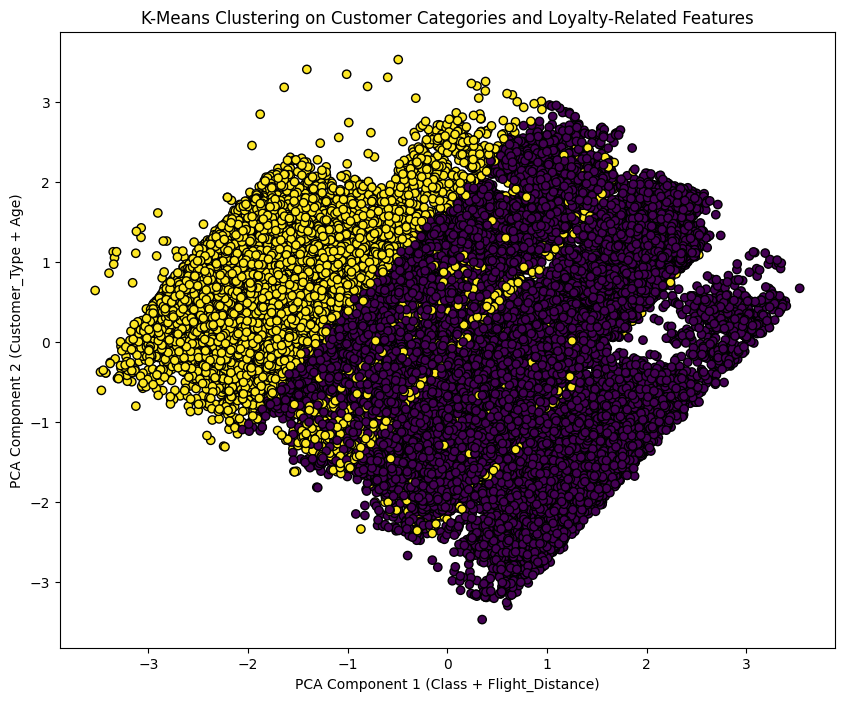

Silhouette Score for K-Means: 0.21243581930900696
Davies-Bouldin Score for K-Means: 1.6074726718370265


In [54]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming X_kmeans contains the selected features for clustering
# Load your dataset if necessary
# X_kmeans = data[['Customer_Type', 'Class', 'Flight_Distance', 'Age', 'Ease_of_Online_booking']]

# Step 1: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# Step 2: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Identify top contributing features for each component
# Get the components (weights) and feature names
components = pca.components_
feature_names = X_kmeans.columns

# Get top 2 contributing features for each component
top_features_pc1 = [feature_names[i] for i in np.argsort(np.abs(components[0]))[-2:]]
top_features_pc2 = [feature_names[i] for i in np.argsort(np.abs(components[1]))[-2:]]

# Construct labels for the PCA components
pc1_label = " + ".join(top_features_pc1)
pc2_label = " + ".join(top_features_pc2)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_kmeans)

# Step 5: Plot with updated labels
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering on Customer Categories and Loyalty-Related Features')
plt.xlabel(f'PCA Component 1 ({pc1_label})')
plt.ylabel(f'PCA Component 2 ({pc2_label})')
plt.show()

# Step 6: Calculate and print Silhouette Score and Davies-Bouldin Score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, kmeans_labels)

print(f'Silhouette Score for K-Means: {silhouette_avg}')
print(f'Davies-Bouldin Score for K-Means: {davies_bouldin_avg}')


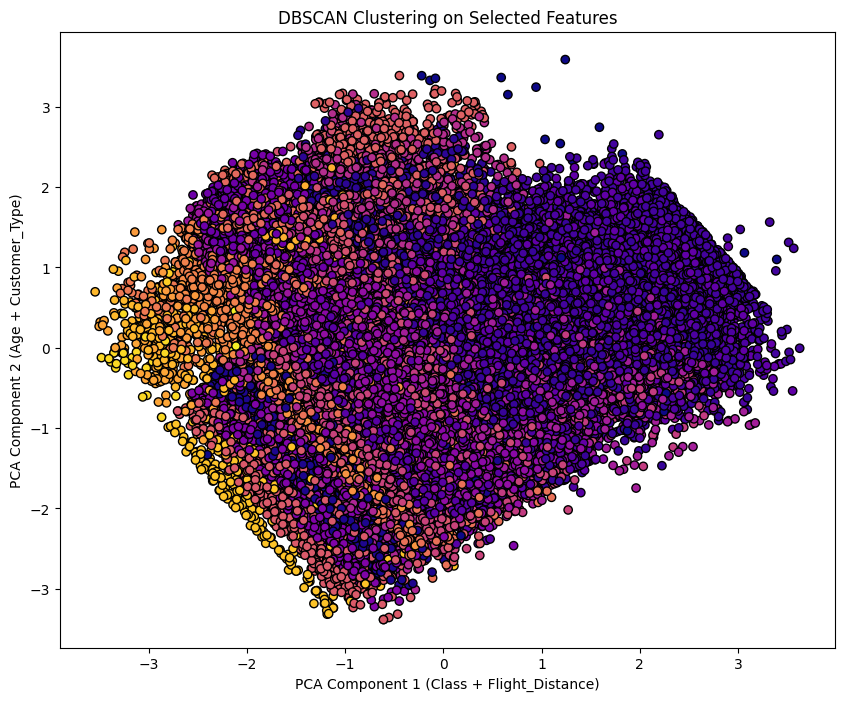

Silhouette Score for DBSCAN: 0.11480386329728835
Davies-Bouldin Score for DBSCAN: 2.440297898429775


In [55]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Select the specified features for DBSCAN clustering
# Load your dataset if necessary
# X_dbscan = data[['Customer_Type', 'Class', 'Flight_Distance', 'Online_boarding', 'Ease_of_Online_booking']]

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dbscan)

# Step 2: Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_dbscan_pca = pca.fit_transform(X_scaled)

# Step 3: Identify top contributing features for each PCA component
components = pca.components_
feature_names = X_dbscan.columns

# Get the top 2 contributing features for each PCA component
top_features_pc1 = [feature_names[i] for i in np.argsort(np.abs(components[0]))[-2:]]
top_features_pc2 = [feature_names[i] for i in np.argsort(np.abs(components[1]))[-2:]]

# Construct labels for the PCA components
pc1_label = " + ".join(top_features_pc1)
pc2_label = " + ".join(top_features_pc2)

# Step 4: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Step 5: Plot DBSCAN clustering results with updated labels
plt.figure(figsize=(10, 8))
plt.scatter(X_dbscan_pca[:, 0], X_dbscan_pca[:, 1], c=dbscan_labels, cmap='plasma', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering on Selected Features')
plt.xlabel(f'PCA Component 1 ({pc1_label})')
plt.ylabel(f'PCA Component 2 ({pc2_label})')
plt.show()

# Step 6: Calculate and print Silhouette Score and Davies-Bouldin Score
# Only calculate if there is more than one cluster and if not all points are classified as noise (-1)
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) != 1 + (dbscan_labels == -1).sum():
    silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
    davies_bouldin_avg = davies_bouldin_score(X_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_avg}')
    print(f'Davies-Bouldin Score for DBSCAN: {davies_bouldin_avg}')
else:
    print("DBSCAN did not identify enough clusters for Silhouette or Davies-Bouldin evaluation.")



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


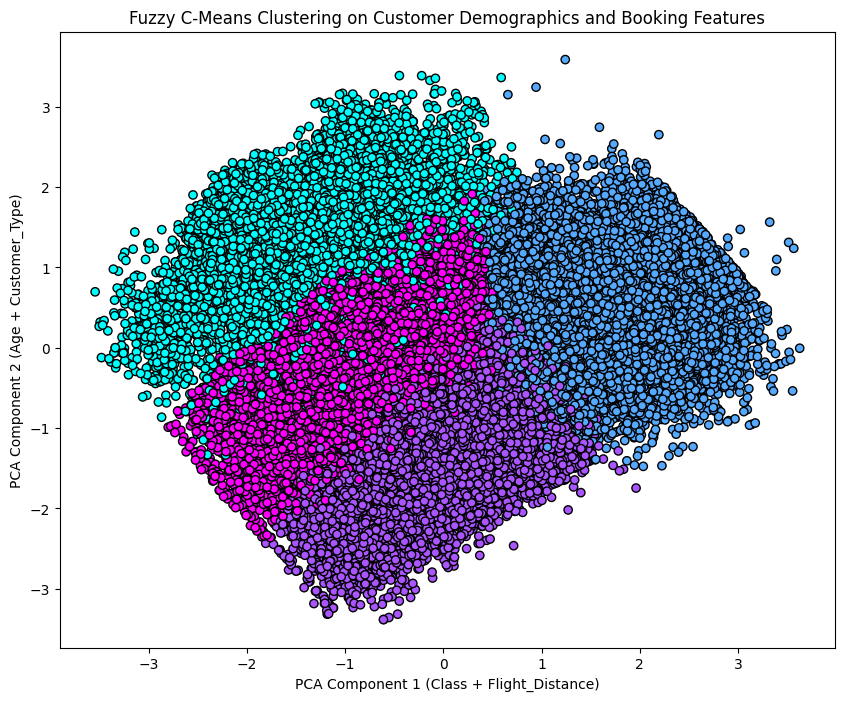

Silhouette Score for Fuzzy C-Means: 0.2750950167502752
Davies-Bouldin Score for Fuzzy C-Means: 1.3781149314135128


In [51]:
!pip install scikit-fuzzy
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Select the specified features for Fuzzy C-Means clustering
X_fuzzy = data[['Customer_Type', 'Class', 'Flight_Distance', 'Age', 'Ease_of_Online_booking']]

# Step 1: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fuzzy)

# Step 2: Apply Fuzzy C-Means Clustering
# Transpose the data for Fuzzy C-Means
X_fuzzy_transposed = X_scaled.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_fuzzy_transposed, c=4, m=2, error=0.005, maxiter=1000, init=None)
fuzzy_labels = np.argmax(u, axis=0)

# Step 3: Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_fuzzy_pca = pca.fit_transform(X_scaled)

# Step 4: Identify top contributing features for each PCA component
# Get the components (weights) and feature names
components = pca.components_
feature_names = X_fuzzy.columns

# Get top 2 contributing features for each component
top_features_pc1 = [feature_names[i] for i in np.argsort(np.abs(components[0]))[-2:]]
top_features_pc2 = [feature_names[i] for i in np.argsort(np.abs(components[1]))[-2:]]

# Construct labels for PCA components
pc1_label = " + ".join(top_features_pc1)
pc2_label = " + ".join(top_features_pc2)

# Plot Fuzzy C-Means clustering results with updated labels
plt.figure(figsize=(10, 8))
plt.scatter(X_fuzzy_pca[:, 0], X_fuzzy_pca[:, 1], c=fuzzy_labels, cmap='cool', marker='o', edgecolor='k')
plt.title('Fuzzy C-Means Clustering on Customer Demographics and Booking Features')
plt.xlabel(f'PCA Component 1 ({pc1_label})')
plt.ylabel(f'PCA Component 2 ({pc2_label})')
plt.show()

# Calculate and display the Silhouette Score and Davies-Bouldin Score
silhouette_avg = silhouette_score(X_scaled, fuzzy_labels)
davies_bouldin_avg = davies_bouldin_score(X_scaled, fuzzy_labels)

print(f'Silhouette Score for Fuzzy C-Means: {silhouette_avg}')
print(f'Davies-Bouldin Score for Fuzzy C-Means: {davies_bouldin_avg}')
